In [1]:
import numpy as np

from matplotlib import pyplot as plt
from typing import Set, List, Tuple, Dict
from collections import defaultdict
from itertools import combinations

In [2]:
def generate_new_points(count: int):
    x = np.random.random(count)
    y = np.random.random(count)
    return list(zip(x, y))

In [33]:
def plot_points_and_lines_with_simplices(points: List[Tuple[float, float]], intersections: List[Set[int]], 
                                         all_2_simplices: Set[Tuple[int, int, int]], epsilon: float, 
                                         draw_circles: bool = False):
    """Plot points, lines between intersecting points, fill 2-simplices, and optionally draw circles."""
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    # Plot points
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    labels = 'abcdefghijklmnopqrstuvwxyz'.upper()[0:len(x_coords)]
    ax.scatter(x_coords, y_coords, color='blue', zorder=5)
    
    # Plot circles around the points if draw_circles is True
    if draw_circles:
        for i, (x, y) in enumerate(points):
            circle = plt.Circle((x, y), epsilon, color='green', fill=False, linestyle='--', alpha=0.5, zorder=3)
            ax.add_patch(circle)  # Add the circle to the plot
    
    # Plot lines based on the intersection data
    for i, connected_points in enumerate(intersections):
        for j in connected_points:
            # Draw a line between points[i] and points[j]
            x_values = [points[i][0], points[j][0]]
            y_values = [points[i][1], points[j][1]]
            ax.plot(x_values, y_values, 'r-', linewidth=1, zorder=1)  # Red lines with width 1
    
    # Fill in the triangles (2-simplices)
    for simplex in all_2_simplices:
        i, j, k = simplex
        x_triangle = [points[i][0], points[j][0], points[k][0]]
        y_triangle = [points[i][1], points[j][1], points[k][1]]
        ax.fill(x_triangle, y_triangle, 'cyan', alpha=0.3, zorder=2)  # Cyan with transparency
    
    # Set labels and show plot
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Points, Intersections, 2-Simplices, and Circles' if draw_circles else 'Points, Intersections, and 2-Simplices')
    ax.grid(True)
    ax.set_aspect('equal', adjustable='box')  # Equal aspect ratio for proper circle display
    ax.set_xlim([min(x_coords)-epsilon*1.2, max(x_coords)+epsilon*1.2])
    ax.set_ylim([min(y_coords)-epsilon*1.2, max(y_coords)+epsilon*1.2])
    
    for i, txt in enumerate(labels):
        ax.annotate(txt, (x_coords[i]+0.025, y_coords[i]+0.025), color='black', size=12.5)
    
    return fig

In [4]:
def get_distance(p1: Tuple[float, float] , p2: Tuple[float, float]) -> float:
    x_dist = p1[0] - p2[0]
    y_dist = p1[1] - p2[1]
    return np.sqrt(x_dist**2 + y_dist**2)

In [5]:
def get_intersections(points: List[Tuple[float, float]], epsilon: float) -> List[Set[int]]:
    intersections: List[Set[int]] = [set() for _ in points]
    
    for i in range(len(points)-1):
        for j in range(i+1, len(points)):
            if get_distance(points[i], points[j]) <= 2 * epsilon:
                intersections[i].add(j)
                intersections[j].add(i)
    return intersections

In [6]:
def get_common_intersections(intersections: List[Set[int]]) -> Set[Tuple[int, int, int]]:
    all_2_Simplicials = set()
    for i in range(len(intersections)):
        for j in intersections[i]:
            for intersects in intersections[i] & intersections[j]:
                x, y, z = sorted((i, j, intersects))
                all_2_Simplicials.add((x, y, z))
    return all_2_Simplicials

In [7]:
def get_circle_intersections(p1, p2, r: float):
    x0, y0 = p1[0], p1[1]
    x1, y1 = p2[0], p2[1]
    # circle 1: (x0, y0), radius r0
    # circle 2: (x1, y1), radius r1

    d=np.sqrt((x1-x0)**2 + (y1-y0)**2)
    
    a=(r**2-r**2+d**2)/(2*d)
    h=np.sqrt(r**2-a**2)
    x2=x0+a*(x1-x0)/d   
    y2=y0+a*(y1-y0)/d   
    x3=x2+h*(y1-y0)/d     
    y3=y2-h*(x1-x0)/d 

    x4=x2-h*(y1-y0)/d
    y4=y2+h*(x1-x0)/d
    
    return (x3, y3), (x4, y4)

In [8]:
def test_cech(points: List[Tuple[float, float]], common_intersections: Set[Tuple[int, int, int]], epsilon: float) -> Set[Tuple[int, int, int]]:
    geometric_3_intersection = set()
    for i, j, z in common_intersections:
        ij_intersection = get_circle_intersections(points[i], points[j], epsilon)
        iz_intersection = get_circle_intersections(points[i], points[z], epsilon)
        jz_intersection = get_circle_intersections(points[j], points[z], epsilon)
        
        # check if intersections between circles exist:
        if ij_intersection is None or iz_intersection is None or jz_intersection is None:
            continue
        
        # check if any of the intersections is contained within the 3rd circle, if so, it is geometrically intersecting
        if (get_distance(ij_intersection[0], points[z]) < epsilon or
            get_distance(ij_intersection[1], points[z]) < epsilon or
            get_distance(iz_intersection[0], points[j]) < epsilon or
            get_distance(iz_intersection[1], points[j]) < epsilon or
            get_distance(jz_intersection[0], points[i]) < epsilon or
            get_distance(jz_intersection[1], points[i]) < epsilon):
                geometric_3_intersection.add((i, j, z))
    return geometric_3_intersection

## Cech complex:

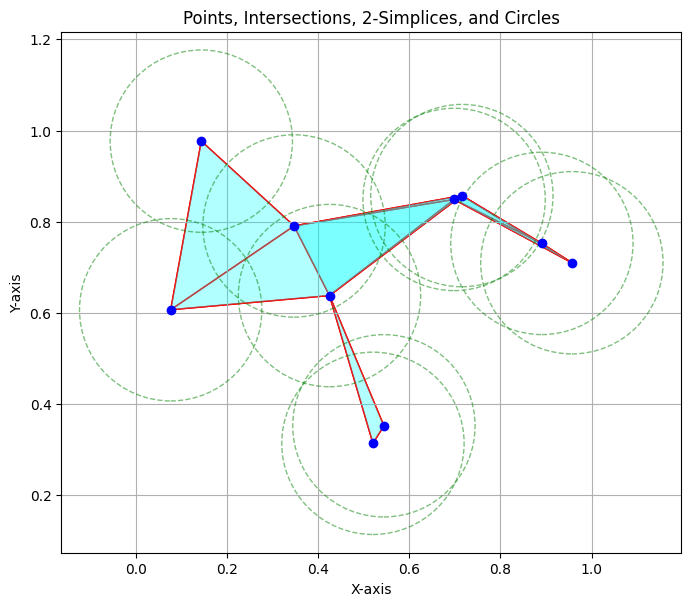

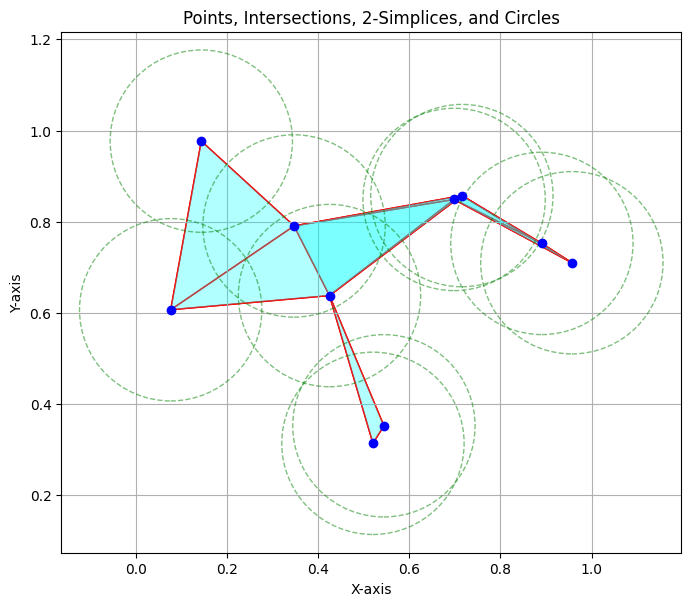

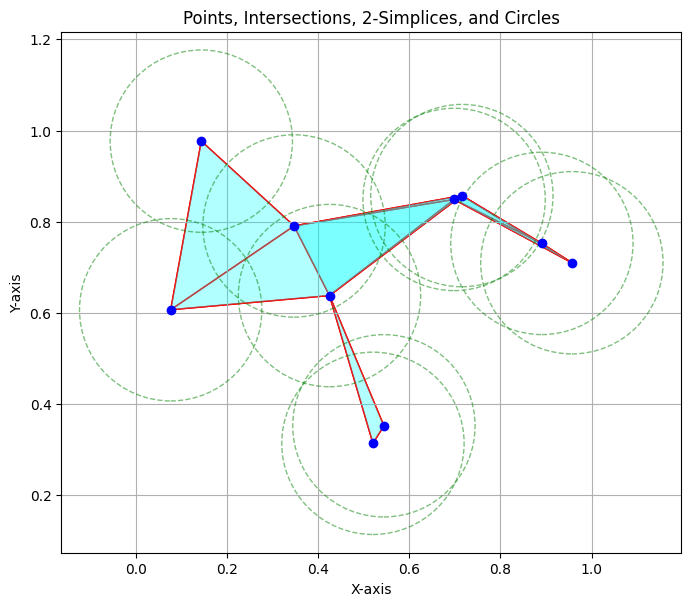

In [9]:
epsilon = 0.2
zero_simplices = generate_new_points(10)
one_simplices = get_intersections(zero_simplices, epsilon)
two_simplices = get_common_intersections(one_simplices)
cech_two_simplices = test_cech(zero_simplices, two_simplices, epsilon)

plot_points_and_lines_with_simplices(zero_simplices, one_simplices, two_simplices, epsilon, draw_circles=True)
plot_points_and_lines_with_simplices(zero_simplices, one_simplices, cech_two_simplices, epsilon, draw_circles=True)

In [10]:
def visualize_points(x, y):
    plt.scatter(x, y)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()

## Vietoris-Rips 

In [11]:
import numpy as np

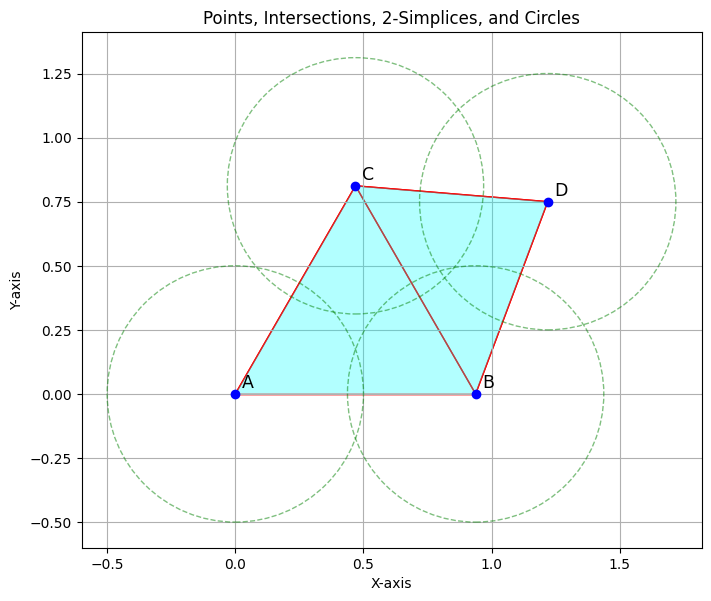

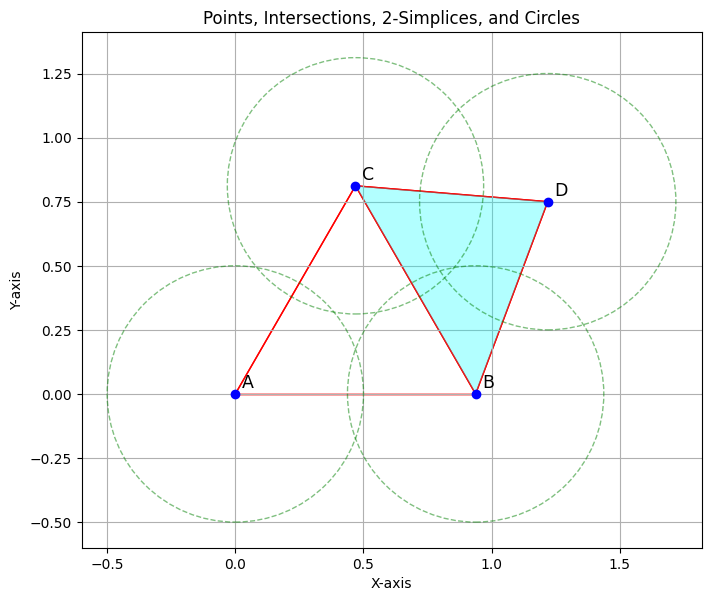

In [34]:
epsilon = 1/2
zero_simplices = [(0, 0), (1, 0), (1/2, np.sqrt(3)/2), (1.3, 0.8)]
for i in range(len(zero_simplices)):
    zero_simplices[i] = (zero_simplices[i][0]*15/8/2, zero_simplices[i][1]*15/8/2)
one_simplices = get_intersections(zero_simplices, epsilon)
two_simplices = get_common_intersections(one_simplices)
cech_two_simplices = test_cech(zero_simplices, two_simplices, epsilon)

plot_points_and_lines_with_simplices(zero_simplices, one_simplices, two_simplices, epsilon, draw_circles=True)
fig = plot_points_and_lines_with_simplices(zero_simplices, one_simplices, cech_two_simplices, epsilon, draw_circles=True)
fig.savefig("cech.svg", format="svg", dpi=1000)

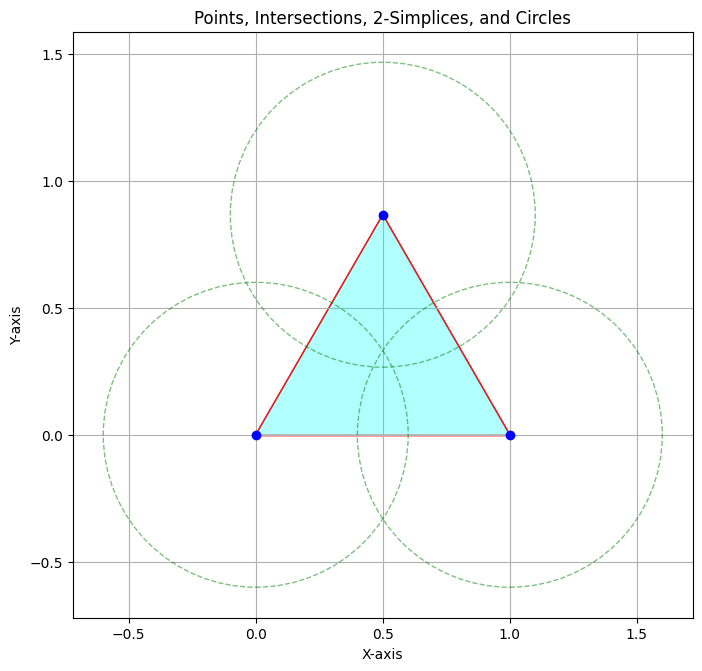

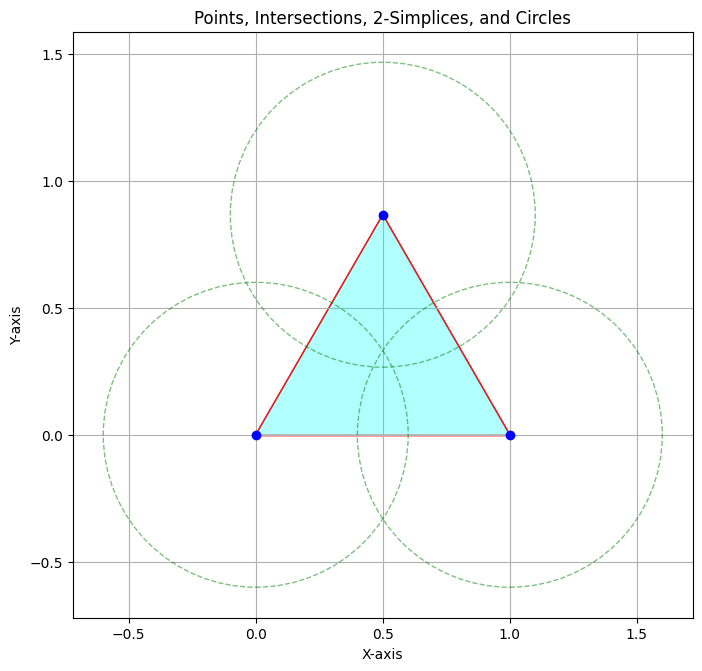

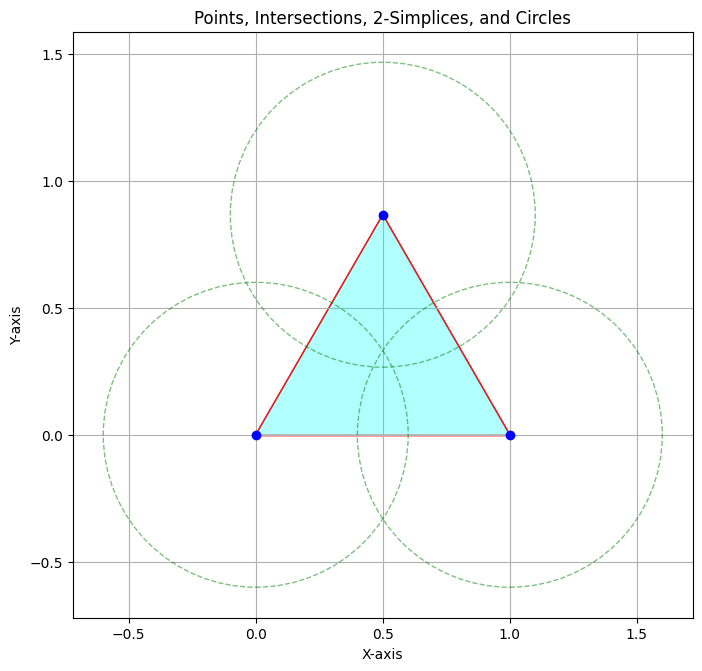

In [13]:
epsilon = 9/15
zero_simplices = [(0, 0), (1, 0), (1/2, np.sqrt(3)/2)]
one_simplices = get_intersections(zero_simplices, epsilon)
two_simplices = get_common_intersections(one_simplices)
cech_two_simplices = test_cech(zero_simplices, two_simplices, epsilon)

plot_points_and_lines_with_simplices(zero_simplices, one_simplices, two_simplices, epsilon, draw_circles=True)
plot_points_and_lines_with_simplices(zero_simplices, one_simplices, cech_two_simplices, epsilon, draw_circles=True)

In [14]:
def get_all_distances(points: List[Tuple[float, float]]) -> Dict[int, Dict[int, float]]:
    distances: Dict[int, Dict[int, float]] = defaultdict((lambda : defaultdict()))
    
    for i in range(len(points)-1):
        for j in range(i+1, len(points)):
            distance = get_distance(points[i], points[j])                
            distances[i][j] = distance
            distances[j][i] = distance
    return distances

def get_one_appearances(distances):
    appearances = []
    for i, j in combinations(range(len(distances)), 2):
        appearances.append(({i, j}, distances[i][j]))
    return appearances

def get_two_appearances(distances):
    appearances = []
    for i, j, k in combinations(range(len(distances)), 3):
        distance = max(distances[i][j], distances[j][k], distances[i][k])
        appearances.append(({i, j, k}, distance))
    return appearances

In [15]:
points = generate_new_points(5)
distances = get_all_distances(points)

zero_appearances = [({i}, 0) for i in range(len(points))]
one_appearances = get_one_appearances(distances)
two_appearances = get_two_appearances(distances)

appearances = zero_appearances + one_appearances + two_appearances
sorted(appearances, key=lambda x: x[1])

[({0}, 0),
 ({1}, 0),
 ({2}, 0),
 ({3}, 0),
 ({4}, 0),
 ({0, 4}, 0.15937549904409545),
 ({1, 3}, 0.19609353477700978),
 ({0, 3}, 0.2099321212215037),
 ({0, 2}, 0.2585477530530644),
 ({2, 4}, 0.26169555068259553),
 ({0, 2, 4}, 0.26169555068259553),
 ({3, 4}, 0.36928676169123936),
 ({0, 3, 4}, 0.36928676169123936),
 ({2, 3}, 0.37414145028644796),
 ({0, 2, 3}, 0.37414145028644796),
 ({2, 3, 4}, 0.37414145028644796),
 ({0, 1}, 0.374951602085739),
 ({0, 1, 3}, 0.374951602085739),
 ({1, 2}, 0.43171812345911714),
 ({0, 1, 2}, 0.43171812345911714),
 ({1, 2, 3}, 0.43171812345911714),
 ({1, 4}, 0.5253666780509024),
 ({0, 1, 4}, 0.5253666780509024),
 ({1, 2, 4}, 0.5253666780509024),
 ({1, 3, 4}, 0.5253666780509024)]